In [306]:
import glob
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import os

In [308]:
def actual_counts(bias_image):
    return bias_image / 16 + 1

In [310]:
directory_path = 'C:/naiya_rye_ - Copy/Bias'

In [312]:
bias_images = glob.glob(os.path.join(directory_path, "*.fit"))

image_data_list = []

In [314]:
for file in bias_images:
    with fits.open(file) as foo:
        foo.info()
        bias_image = foo[0].data  
        fixed_image = actual_counts(bias_image)
        image_data_list.append(fixed_image)

Filename: C:/naiya_rye_ - Copy/Bias\Autosave Image (Bias-Naiya-Rye)-0001.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (4656, 3522)   int16 (rescales to uint16)   
Filename: C:/naiya_rye_ - Copy/Bias\Autosave Image (Bias-Naiya-Rye)-0002.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (4656, 3522)   int16 (rescales to uint16)   
Filename: C:/naiya_rye_ - Copy/Bias\Autosave Image (Bias-Naiya-Rye)-0003.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (4656, 3522)   int16 (rescales to uint16)   
Filename: C:/naiya_rye_ - Copy/Bias\Autosave Image (Bias-Naiya-Rye)-0004.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (4656, 3522)   int16 (rescales to uint16)   
Filename: C:/naiya_rye_ - Copy/Bias\Autosave Image (Bias-Naiya-Rye)-0005.fit
No.    Name      Ve

In [316]:
image_data_stack = np.array(image_data_list)
average_image = np.mean(image_data_stack, axis=0)

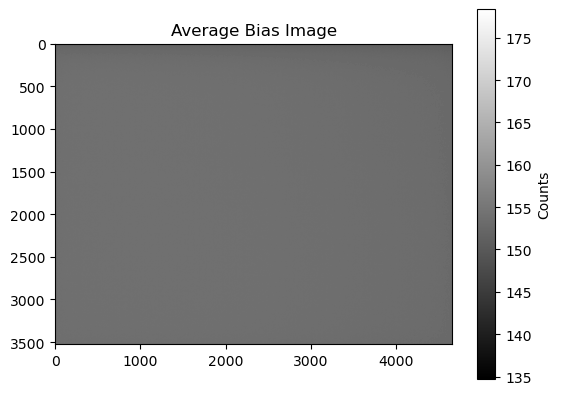

In [251]:
plt.imshow(average_image, cmap='gray')
plt.colorbar(label='Counts')
plt.title('Average Bias Image')
plt.show()

In [318]:
#Median of that^
median_bias = np.median(average_image)
print(median_bias)

153.65


In [320]:
#Below will be our twilight flat stuff

In [322]:
#Converting twilight data back to real
def actual_counts(twilight_flat):
    return twilight_flat / 16 + 1

In [324]:
directory_path_two = 'C:/naiya_rye_ - Copy/Twilights 30-40'

In [326]:
twilight_flats = glob.glob(os.path.join(directory_path, "*.fit"))

normalized_twilight_flats = []

In [328]:
#Loop for my flatz
for file in twilight_flats:
    with fits.open(file) as foo:
        twilight_image = foo[0].data
        
        normalized_flat = (twilight_image - average_image) / median_bias
        
        normalized_twilight_flats.append(normalized_flat)

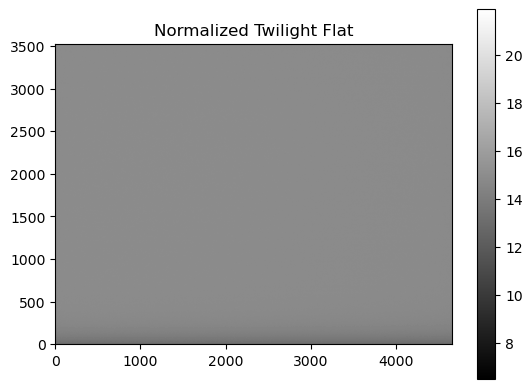

In [30]:
plt.imshow(normalized_twilight_flats[0], cmap='gray', origin='lower')
plt.colorbar()  
plt.title('Normalized Twilight Flat')
plt.show() 

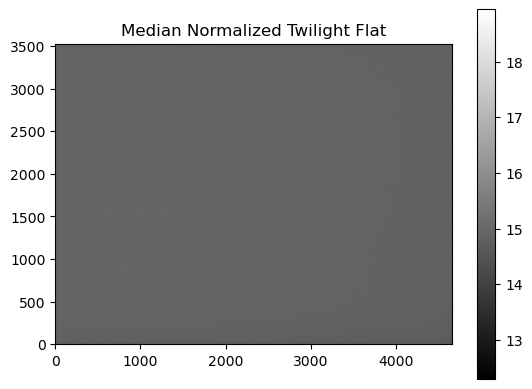

In [31]:
# Median flats- have to use 32 instead of 64 because low RAM lol
normalized_twilight_stack = np.array(normalized_twilight_flats, dtype=np.float32)

# Median value
median_normalized_twilight_flat = np.median(normalized_twilight_stack, axis=0)

# Plot the median normalized twilight flat
import matplotlib.pyplot as plt
plt.imshow(median_normalized_twilight_flat, cmap='gray', origin='lower')
plt.colorbar()
plt.title('Median Normalized Twilight Flat')
plt.show()

In [207]:
#Below are darks
#I pretty much just did what we did for the bias images

In [288]:
dark_images_path = 'C:/naiya_rye_ - Copy/Darks 3s'
dark_images_3s = glob.glob(dark_images_path + '*.fit')

darks_list_3s = []

def actual_counts(dark_image_3s):
    return dark_image_3s / 16 + 1  

for file in dark_images_3s:
    with fits.open(file) as foo:
        foo.info()
        dark_image_3s = foo[0].data  
        fixed_image_3s = actual_counts(dark_image_3s)
        darks_list_3s.append(fixed_image_3s)

Filename: C:/naiya_rye_ - Copy\Darks 3s right this time-0001.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (4656, 3522)   int16 (rescales to uint16)   
Filename: C:/naiya_rye_ - Copy\Darks 3s right this time-0002.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (4656, 3522)   int16 (rescales to uint16)   
Filename: C:/naiya_rye_ - Copy\Darks 3s right this time-0003.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (4656, 3522)   int16 (rescales to uint16)   
Filename: C:/naiya_rye_ - Copy\Darks 3s right this time-0004.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (4656, 3522)   int16 (rescales to uint16)   
Filename: C:/naiya_rye_ - Copy\Darks 3s right this time-0005.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY     

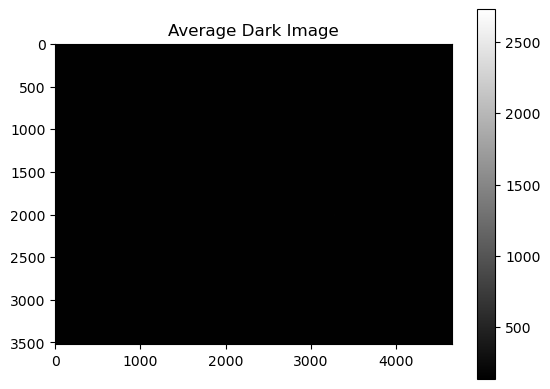

In [289]:
dark_stack_3s = np.array(darks_list_3s)
average_dark_image = np.mean(dark_stack_3s, axis=0)
    
    
plt.imshow(average_dark_image, cmap='gray')
plt.colorbar()
plt.title("Average Dark Image")
plt.show()

In [334]:
dark_images_path_10s = "C:/naiya_rye_ - Copy/Darks 10s"
#"C:/naiya_rye_ - Copy/Darks 10s"
dark_images_10s = glob.glob(dark_images_path_10s + '*.fit')

darks_10s_list = []

def actual_counts(dark_image_10s ):
    return dark_image_10s / 16 + 1 

for file in dark_images_10s:
    with fits.open(file) as foo:
        foo.info()
        dark_image_10s = foo[0].data  
        fixed_image_10s = actual_counts(dark_image_10s)
        darks_10s_list.append(fixed_image_10s)
 
    

Filename: C:/naiya_rye_ - Copy\Darks 10s-0001.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (4656, 3522)   int16 (rescales to uint16)   
Filename: C:/naiya_rye_ - Copy\Darks 10s-0002.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (4656, 3522)   int16 (rescales to uint16)   
Filename: C:/naiya_rye_ - Copy\Darks 10s-0003.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (4656, 3522)   int16 (rescales to uint16)   
Filename: C:/naiya_rye_ - Copy\Darks 10s-0004.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (4656, 3522)   int16 (rescales to uint16)   
Filename: C:/naiya_rye_ - Copy\Darks 10s-0005.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (4656, 3522)   int16 (rescales to uint16)   
Filen

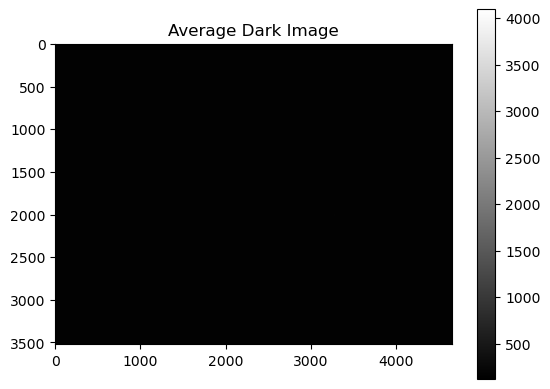

In [335]:
dark_stack_10s = np.array(darks_10s_list)
average_dark_image_10s = np.mean(dark_stack_10s, axis=0) 
  
plt.imshow(average_dark_image_10s, cmap='gray')
plt.colorbar()
plt.title("Average Dark Image")
plt.show()

In [394]:

def actual_counts(image):
    return image / 16 + 1
    
bias_file_1 = r"C:\naiya_rye_ - Copy/Bias/Autosave Image (Bias-Naiya-Rye)-0001.fit"
bias_file_2 = r"C:/naiya_rye_ - Copy/Bias/Autosave Image (Bias-Naiya-Rye)-0002.fit"

with fits.open(bias_file_1) as bias1:
    bias_image1 = bias1[0].data

bias_image1_corrected = actual_counts(bias_image1)

with fits.open(bias_file_2) as bias2:
    bias_image2 = bias2[0].data

bias_image2_corrected = actual_counts(bias_image2)

difference_in_bias = bias_image1_corrected - bias_image2_corrected

pixel_variations = difference_in_bias.flatten()

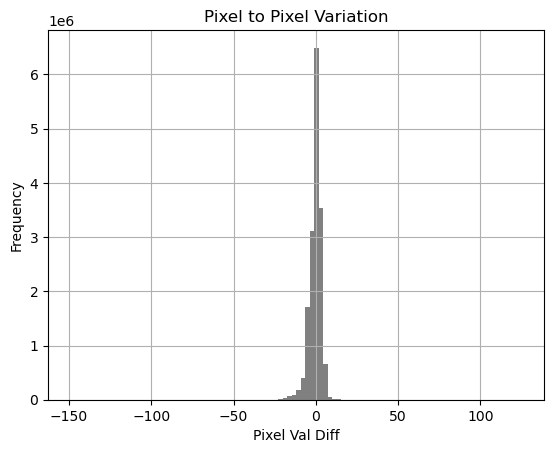

In [398]:
plt.hist(pixel_variations, bins=100, color='gray')
plt.title('Pixel to Pixel Variation')
plt.xlabel('Pixel Val Diff')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [402]:
sigma_read = np.std(pixel_variations)/np.sqrt(2)

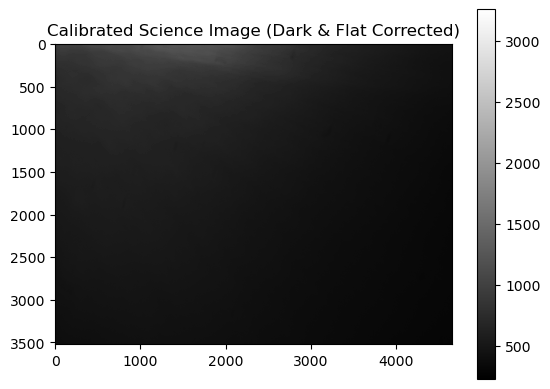

In [433]:
science_image_file = "C:/naiya_rye_ - Copy/Deneb_Naiya_Rye3.fit"
with fits.open(science_image_file) as hdul_science:
    science_image_data = hdul_science[0].data

science_image_corrected = science_image_data - average_dark_image
science_image_corrected -= average_image
science_image_calibrated = science_image_corrected / median_normalized_twilight_flat

plt.imshow(science_image_calibrated, cmap='gray')
plt.title('Calibrated Science Image (Dark & Flat Corrected)')
plt.colorbar()
plt.show()